In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

# Gettting the training data

In [2]:
# gettting data
train_df = pd.read_csv("train.csv")

# Basic Insight of Dataset

In [3]:
# survival: Survival
# PassengerId: Unique Id of a passenger.
# pclass: Ticket class
# sex: Sex
# Age: Age in years
# sibsp: # of siblings / spouses aboard the Titanic
# parch: # of parents / children aboard the Titanic
# ticket: Ticket number
# fare: Passenger fare
# cabin: Cabin number
# embarked: Port of Embarkation

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Somerton, Mr. Francis William",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Data Visualization

In [10]:
women = train_df[train_df['Sex']=='female']
women_survived = women[women['Survived']== 1]
women_not_survived = women[women['Survived']== 0]
women_f = pd.DataFrame({'Survived':women_survived['Age'],'Not Survived':women_not_survived['Age']})

In [11]:
men = train_df[train_df['Sex']=='male']
men_survived = men[men['Survived']== 1]
men_not_survived = men[men['Survived']== 0]
men_f = pd.DataFrame({'Survived':men_survived['Age'],'Not Survived':men_not_survived['Age']})

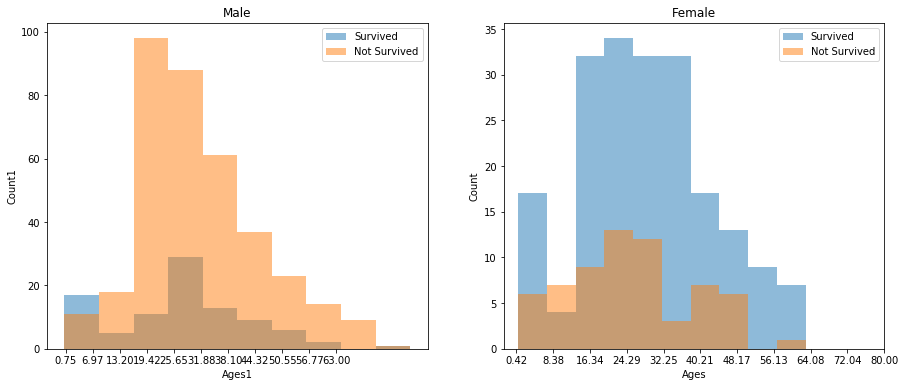

In [12]:
count, bin_edges = np.histogram(women_survived['Age'].dropna(),10)
wcount, wbin_edges = np.histogram(men_survived['Age'].dropna(),10)

fig, ax = plt.subplots(1,2)
men_f[['Survived','Not Survived']].plot(kind='hist',
                                        ax=ax[0],
                                        figsize=(15, 6),
                                        alpha=0.5,
                                        xticks=bin_edges)

ax[0].set_xlabel('Ages1')
ax[0].set_ylabel('Count1')
ax[0].set_title('Male')

women_f[['Survived','Not Survived']].plot(kind='hist',
                                           ax=ax[1],
                                          figsize=(15, 6),
                                          alpha=0.5,
                                          xticks=wbin_edges)

ax[1].set_xlabel('Ages')
ax[1].set_ylabel('Count')
ax[1].set_title('Female')
plt.show()

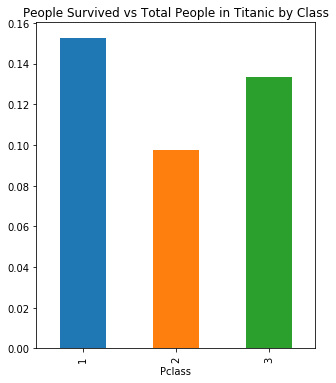

In [13]:
df_pclass = train_df[['Pclass','Survived']]
df_pclass_survived = df_pclass.groupby('Pclass').count()
df_pclass_survived.rename(columns={'Survived':'Total'}, inplace=True)
# print(df_pclass_survived['Survived'].sum())
df_pclass_survived['Survived'] = df_pclass[df_pclass['Survived'] == 1].groupby('Pclass').count()
df_pclass_survived['Survived %'] = df_pclass_survived['Survived']/df_pclass_survived['Total'].sum()
# df_pclass_survived
ax = df_pclass_survived['Survived %'].plot(kind='bar',
                            figsize=(5, 6),
                            )

plt.title('People Survived vs Total People in Titanic by Class')
plt.show()
# import seaborn as sns
# sns.barplot(x='Pclass', y='Survived', data=train_df)

# Data Wrangling

In [14]:
train_df['relatives'] = train_df['SibSp'] + train_df['Parch']

In [15]:
# Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.
missing_data = train_df.isnull()

<h4> Deal with missing data </h4>

In [16]:
# columns with null valuues
for column in missing_data.columns.values.tolist():
    if any(missing_data[column]):
        print(column)
        print (missing_data[column].value_counts())
        print("")   

Age
False    714
True     177
Name: Age, dtype: int64

Cabin
True     687
False    204
Name: Cabin, dtype: int64

Embarked
False    889
True       2
Name: Embarked, dtype: int64



In [17]:
#age column
avg_age=train_df['Age'].astype('float').mean(axis=0)
train_df['Age'].replace(np.nan, avg_age, inplace=True)

In [18]:
# cabin column
temp = []
train_df['Cabin'] = train_df['Cabin'].fillna("Z0")
for i in train_df['Cabin']:
    temp.append(i[0])
train_df['Cabin'] = pd.Series(temp)

In [19]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U":8,"Z":0}
train_df['Cabin'] = train_df['Cabin'].map(deck)

In [20]:
# any(train_df['Cabin'].isnull())
train_df['Cabin'] = train_df['Cabin'].fillna(0)
train_df['Cabin'] = train_df['Cabin'].astype(int)

In [21]:
# Embarked column
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [22]:
common_value = 'S'
train_df['Embarked'] = train_df['Embarked'].fillna(common_value)

<h4>Convert data types to proper format</h4>

In [23]:
# train_df.head()

In [24]:
# Name column covert into Title column
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
# replace titles with a more common title or as Rare

train_df['Title'] = train_df['Title'].replace(['Lady',
'Countess','Capt', 'Col','Don', 'Dr',\
'Major', 'Rev', 'Sir',
'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
train_df['Title'] = train_df['Title'].map(titles)
# filling NaN with 0, to get safe
train_df['Title'] = train_df['Title'].fillna(0)

In [25]:
# Gender column
# genders = {"male": 0, "female": 1}
# train_df['Sex'] = train_df['Sex'].map(genders)
dummy_variable_1 = pd.get_dummies(train_df["Sex"])
dummy_variable_1.rename(columns={'female':'Female', 'male':'Male'}, inplace=True)
dummy_variable_1.head()

,Female,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [26]:
train_df = pd.concat([train_df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
train_df.drop("Sex", axis = 1, inplace=True)

In [27]:
# train_df.head()

In [28]:
# ports = {"S": 0, "C": 1, "Q": 2}
# train_df['Embarked'] = train_df['Embarked'].map(ports)
dummy_variable_2 = pd.get_dummies(train_df["Embarked"])
dummy_variable_2.rename(columns={'S':'Embarked-S', 'C':'Embarked-C','Q':'Embarked-Q'}, inplace=True)

train_df = pd.concat([train_df, dummy_variable_2], axis=1)

train_df.drop("Embarked", axis = 1, inplace=True)

<h4>Dropping unnecssary columns</h4>

In [29]:
train_df = train_df.drop(['PassengerId'], axis=1)
train_df = train_df.drop(['Ticket'], axis=1)
train_df = train_df.drop(['Name'], axis=1)

<h4>Creating Categories</h4>

In [30]:
# conveting age column to categorial column
train_df['Age'] = train_df['Age'].astype(int)

train_df.loc[ train_df['Age'] <= 11, 'Age'] = 0
train_df.loc[(train_df['Age'] > 11) & (train_df['Age'] <= 18),'Age'] = 1
train_df.loc[(train_df['Age'] > 18) & (train_df['Age'] <= 22),'Age'] = 2
train_df.loc[(train_df['Age'] > 22) & (train_df['Age'] <= 27),'Age'] = 3
train_df.loc[(train_df['Age'] > 27) & (train_df['Age'] <= 33),'Age'] = 4
train_df.loc[(train_df['Age'] > 33) & (train_df['Age'] <= 40),'Age'] = 5
train_df.loc[(train_df['Age'] > 40) & (train_df['Age'] <= 66),'Age'] = 6
train_df.loc[ train_df['Age'] > 66, 'Age'] = 6



In [31]:
# converting Fare column to categorial column
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <=14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <=31), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 31) & (train_df['Fare'] <= 99),'Fare'] = 3
train_df.loc[(train_df['Fare'] > 99) & (train_df['Fare'] <= 250),'Fare'] = 4
train_df.loc[ train_df['Fare'] > 250, 'Fare'] = 5
train_df['Fare'] = train_df['Fare'].astype(int)

In [32]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,relatives,Title,Female,Male,Embarked-C,Embarked-Q,Embarked-S
0,0,3,2,1,0,0,0,1,1,0,1,0,0,1
1,1,1,5,1,0,3,3,1,3,1,0,1,0,0
2,1,3,3,0,0,1,0,0,2,1,0,0,0,1
3,1,1,5,1,0,3,3,1,3,1,0,0,0,1
4,0,3,5,0,0,1,0,0,1,0,1,0,0,1


In [33]:
# train_df.to_csv('train_final.csv')

In [34]:
X = train_df.drop(['Survived'],axis=1)
y = train_df['Survived']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Classification 

## Finding K for K Nearest Neighbor(KNN)

In [36]:
# Import library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [37]:
from sklearn import metrics

# What about other Ks
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.75      , 0.73134328, 0.78358209, 0.76492537, 0.79104478,
       0.75      , 0.76865672, 0.76865672, 0.76119403, 0.75373134,
       0.76865672, 0.76865672, 0.76865672, 0.76865672])

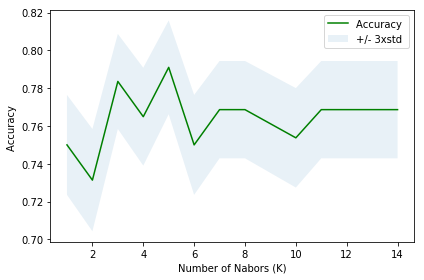

In [38]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [39]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7910447761194029 with k= 5


In [40]:
k = mean_acc.argmax()+1
k

5

# Model Evaluation using Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
classifiers = {'K Nearest Neighbor': KNeighborsClassifier(n_neighbors = k),
 'Decision Tree': DecisionTreeClassifier(criterion="entropy", max_depth = 4),
 'Support vector machine': svm.SVC(kernel='rbf'),
 'Logistic Regression': LogisticRegression(C=0.5, solver='liblinear'),
 'Random Forest Classifier': RandomForestClassifier(n_estimators=100)}

In [43]:
for cls in classifiers:
    scores = cross_val_score(classifiers[cls], X, y, cv=10, scoring ="accuracy")
    print(f'{cls}:\n{scores}\n Mean: {scores.mean()}\n\n')

K Nearest Neighbor:
[0.8        0.84444444 0.71910112 0.83146067 0.83146067 0.80898876
 0.83146067 0.7752809  0.82022472 0.79545455]
 Mean: 0.8057876517988877


Decision Tree:
[0.81111111 0.82222222 0.76404494 0.82022472 0.84269663 0.79775281
 0.83146067 0.83146067 0.85393258 0.85227273]
 Mean: 0.8227179094313927


Support vector machine:
[0.82222222 0.85555556 0.76404494 0.87640449 0.82022472 0.83146067
 0.83146067 0.80898876 0.85393258 0.86363636]
 Mean: 0.8327930995346726


Logistic Regression:
[0.81111111 0.8        0.7752809  0.86516854 0.79775281 0.7752809
 0.83146067 0.80898876 0.83146067 0.82954545]
 Mean: 0.8126049824083532


Random Forest Classifier:
[0.77777778 0.82222222 0.7752809  0.78651685 0.83146067 0.84269663
 0.80898876 0.82022472 0.85393258 0.86363636]
 Mean: 0.818273748723187




# Predication Of Test Data

In [44]:
test_df = pd.read_csv("test.csv")

In [45]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h4>Data Wrangling</h4>

In [46]:
test_df['relatives'] = test_df['SibSp'] + test_df['Parch']

<h4> Deal with missing data </h4>

In [47]:
missing_data2 = test_df.isnull()

In [48]:
# columns with null valuues
for column in missing_data2.columns.values.tolist():
    if any(missing_data2[column]):
        print(column)
        print (missing_data2[column].value_counts())
        print("")  

Age
False    332
True      86
Name: Age, dtype: int64

Fare
False    417
True       1
Name: Fare, dtype: int64

Cabin
True     327
False     91
Name: Cabin, dtype: int64



In [49]:
#age column
avg_age=test_df['Age'].astype('float').mean(axis=0)
test_df['Age'].replace(np.nan, avg_age, inplace=True)

In [50]:
# cabin column
temp = []
test_df['Cabin'] = test_df['Cabin'].fillna("Z0")
for i in test_df['Cabin']:
    temp.append(i[0])
test_df['Cabin'] = pd.Series(temp)

In [51]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U":8,"Z":0}
test_df['Cabin'] = test_df['Cabin'].map(deck)

In [52]:
# any(test_df['Cabin'].isnull())
test_df['Cabin'] = test_df['Cabin'].fillna(0)
test_df['Cabin'] = test_df['Cabin'].astype(int)

In [53]:
test_df['Fare'].replace(np.nan,0 , inplace=True)

<h4>Convert data types to proper format</h4>

In [54]:
# Name column covert into Title column
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
# replace titles with a more common title or as Rare

test_df['Title'] = test_df['Title'].replace(['Lady',
'Countess','Capt', 'Col','Don', 'Dr',\
'Major', 'Rev', 'Sir',
'Jonkheer', 'Dona'], 'Rare')
test_df['Title'] = test_df['Title'].replace('Mlle', 'Miss')
test_df['Title'] = test_df['Title'].replace('Ms', 'Miss')
test_df['Title'] = test_df['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
test_df['Title'] = test_df['Title'].map(titles)
# filling NaN with 0, to get safe
test_df['Title'] = test_df['Title'].fillna(0)

In [55]:
dummy_variable_1 = pd.get_dummies(test_df["Sex"])
dummy_variable_1.rename(columns={'female':'Female', 'male':'Male'}, inplace=True)
dummy_variable_1.head()

,Female,Male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [56]:
test_df = pd.concat([test_df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
test_df.drop("Sex", axis = 1, inplace=True)

In [57]:
dummy_variable_2 = pd.get_dummies(test_df["Embarked"])
dummy_variable_2.rename(columns={'S':'Embarked-S', 'C':'Embarked-C','Q':'Embarked-Q'}, inplace=True)

test_df = pd.concat([test_df, dummy_variable_2], axis=1)

test_df.drop("Embarked", axis = 1, inplace=True)

<h4>conveting age column to categorial column</h4>

In [58]:
# conveting age column to categorial column

test_df['Age'] = test_df['Age'].astype(int)

test_df.loc[ test_df['Age'] <= 11, 'Age'] = 0
test_df.loc[(test_df['Age'] > 11) & (test_df['Age'] <= 18),'Age'] = 1
test_df.loc[(test_df['Age'] > 18) & (test_df['Age'] <= 22),'Age'] = 2
test_df.loc[(test_df['Age'] > 22) & (test_df['Age'] <= 27),'Age'] = 3
test_df.loc[(test_df['Age'] > 27) & (test_df['Age'] <= 33),'Age'] = 4
test_df.loc[(test_df['Age'] > 33) & (test_df['Age'] <= 40),'Age'] = 5
test_df.loc[(test_df['Age'] > 40) & (test_df['Age'] <= 66),'Age'] = 6
test_df.loc[ test_df['Age'] > 66, 'Age'] = 6

In [59]:
# converting Fare column to categorial column
test_df.loc[ test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <=14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <=31), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 31) & (test_df['Fare'] <= 99),'Fare'] = 3
test_df.loc[(test_df['Fare'] > 99) & (test_df['Fare'] <= 250),'Fare'] = 4
test_df.loc[ test_df['Fare'] > 250, 'Fare'] = 5
test_df['Fare'] = test_df['Fare'].astype(int)

<h4>Dropping unnecssary columns</h4>

In [60]:
test_df = test_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [61]:
X2 = test_df.drop(['PassengerId'],axis=1)

## Classification

In [62]:
# we will use SVM classifier as it has highest probabilty in cross validation as compared  to others.
clf = svm.SVC(kernel='rbf')
clf.fit(X, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
yhat = clf.predict(X2)

In [64]:
result = pd.DataFrame([test_df['PassengerId'],yhat])

In [65]:
res = result.transpose()
res.rename(columns={'Unnamed 0':'Survived'}, inplace=True)
# res

In [66]:
res.to_csv('result.csv',index=False)